# **Model 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import os
from sklearn.neighbors import NearestNeighbors
from pprint import pprint

In [ ]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip
print("Data Loaded Sucessfully")

--2022-05-04 22:25:58--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  5.75MB/s    in 0.8s    

2022-05-04 22:25:59 (5.75 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base

In [ ]:
#information about data
info= pd.read_csv('ml-100k/u.info', header=None)
list(info[0])

['943 users', '1682 items', '100000 ratings']

In [ ]:
d = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
movie_columns = d.split(' | ')
movie_columns
print("The Total No. of Columns in Movie Dataset are:: "+str(len(movie_columns)))
for i in movie_columns:
  print(i+ " |",end=" ")

The Total No. of Columns in Movie Dataset are:: 24
movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western | 

In [ ]:
movie_data = pd.read_csv('ml-100k/u.item', sep='|',header=None,names=movie_columns,encoding='latin-1')
movie_data.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
movie_dataset = movie_data[['movie id','movie title']]#new dataframe is formed with required features
movie_dataset.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
ratings_columns= ['user id','movie id','rating','timestamp']
ratings_data = pd.read_csv('ml-100k/u.data', sep='\t',header=None,names=ratings_columns)
ratings_data.shape

(100000, 4)

In [ ]:
ratings_data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
print("The movie id's are in the range of "+ str(min(ratings_data['movie id']))+" to " + str(max(ratings_data['movie id'])))

The movie id's are in the range of 1 to 1682


In [ ]:
new_data = pd.merge(ratings_data, movie_dataset, how='inner', on='movie id') #new data set to combine ratings and movie data based on movie_id
new_data.shape 

(100000, 5)

In [ ]:
new_data.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


For a new user recommendation can be done based on 1. Genre 2. Popularity 3. High Rated 4. Highly Rated Popular movies

In [ ]:
def Genre_Based_Recommendation(genre):
  movie_genre = movie_data[['movie id','movie title',genre]]
  movie_genre = movie_genre[movie_genre[genre] == 1]
  MGM = pd.merge(ratings_data, movie_genre, how='inner', on='movie id')
  MGM['rating'].value_counts(sort=False).plot(kind='pie' ,figsize=(10,6), use_index = True, rot=0)
  plt.title('Rating Distribution of Genre: '+genre)
  plt.xlabel('Rating')
  plt.ylabel('Number of ratings')
  plt.show()
  print("\n \n Total User who watched this Genre are: ",len(MGM))

  positive_rated = MGM.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
  #Taking average rating
  positive_rated = positive_rated.to_frame() 
  Famous = MGM.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)
  #Taking number of views into consideration
  Famous = Famous.to_frame()
  Famous.reset_index(level=0, inplace=True)
  Famous.columns = ['movie title', 'Number of Users watched']
  positive_famous = pd.merge(positive_rated, Famous, how = 'inner', on='movie title')
  No_watched,Cut_of_rating=300,4.0
  count,check = 0,0
  while No_watched > 0 and Cut_of_rating > 0: #Looping to get atleast 10 movies, if not we are reducing rating by 0.5 and views by 50
    arr=positive_famous[(positive_famous['Number of Users watched']>No_watched) & (positive_famous['rating']>=Cut_of_rating)]
    if len(arr) < 11:
      if check == 0:
        No_watched -= 50
        check = 1
      else:
        Cut_of_rating -= 0.5
        check = 0
    else:
      break
  print("\n\n Best way to recommend a movie based on Genre considering views and avg rating")
  print("\nBelow movies have rating more than ",Cut_of_rating," with atleast ",No_watched ," viewers.\n")
  print(arr)

In [ ]:
Total_Genre = movie_columns[-19:]
print("The Total No. of Genres present in data are:: "+str(len(Total_Genre)))
count=1
for i in Total_Genre:
  print(str(count)+" "+i)
  count+=1

The Total No. of Genres present in data are:: 19
1 unknown
2 Action
3 Adventure
4 Animation
5 Children
6 Comedy
7 Crime
8 Documentary
9 Drama
10 Fantasy
11 Film-Noir
12 Horror
13 Musical
14 Mystery
15 Romance
16 Sci-Fi
17 Thriller
18 War
19 Western


Please Enter the Genre Number you want to watch  6


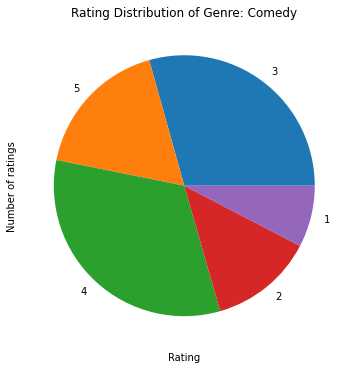


 
 Total User who watched this Genre are:  29832


 Best way to recommend a movie based on Genre considering views and avg rating

Below movies have rating more than  3.5  with atleast  250  viewers.

                                      movie title    rating  \
7                      Princess Bride, The (1987)  4.172840   
14         Monty Python and the Holy Grail (1974)  4.066456   
45                         Full Monty, The (1997)  3.926984   
49                 When Harry Met Sally... (1989)  3.910345   
55                               Toy Story (1995)  3.878319   
58                         Raising Arizona (1987)  3.875000   
61                            Forrest Gump (1994)  3.853583   
63                     Blues Brothers, The (1980)  3.836653   
64                      Back to the Future (1985)  3.834286   
79                           Groundhog Day (1993)  3.764286   
82                            Men in Black (1997)  3.745875   
102            Four Weddings and a Funeral

In [ ]:
print("Please Enter the Genre Number you want to watch ", end=" ")
genre=int(input())
Genre_Based_Recommendation(Total_Genre[genre-1])

# **Recommendation Based on Popularity**

In [ ]:
Famous = new_data.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)
Famous = Famous.to_frame()
Famous.reset_index(level=0, inplace=True)
Famous.columns=['movie title','Total Views']
output=Famous[Famous['Total Views']>=300]
output.head(10)

,movie title,Total Views
0,Star Wars (1977),583
1,Contact (1997),509
2,Fargo (1996),508
3,Return of the Jedi (1983),507
4,Liar Liar (1997),485
5,"English Patient, The (1996)",481
6,Scream (1996),478
7,Toy Story (1995),452
8,Air Force One (1997),431
9,Independence Day (ID4) (1996),429


Recommendation Based on Rating

In [ ]:
positive_rating = new_data.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
positive_rating = positive_rating.to_frame()
positive_rating.reset_index(level=0, inplace=True)
positive_rating.columns = ['movie title', 'Average Rating']
positive_rating.head(10)

,movie title,Average Rating
0,They Made Me a Criminal (1939),5.0
1,Marlene Dietrich: Shadow and Light (1996),5.0
2,"Saint of Fort Washington, The (1993)",5.0
3,Someone Else's America (1995),5.0
4,Star Kid (1997),5.0
5,"Great Day in Harlem, A (1994)",5.0
6,Aiqing wansui (1994),5.0
7,Santa with Muscles (1996),5.0
8,Prefontaine (1997),5.0
9,Entertaining Angels: The Dorothy Day Story (1996),5.0


Recommendation Based on Popularity and Avg Rating

In [ ]:
MoreFamous = pd.merge(positive_rating, Famous, how = 'inner', on='movie title')
MoreFamous[MoreFamous['Total Views']>400]
MoreFamous[(MoreFamous['Total Views']>300) & (MoreFamous['Average Rating']>=4.0)]

,movie title,Average Rating,Total Views
23,Star Wars (1977),4.358491,583
32,"Silence of the Lambs, The (1991)",4.289744,390
34,"Godfather, The (1972)",4.283293,413
40,Raiders of the Lost Ark (1981),4.252381,420
45,Titanic (1997),4.245714,350
49,"Empire Strikes Back, The (1980)",4.204360,367
61,"Princess Bride, The (1987)",4.172840,324
64,Fargo (1996),4.155512,508
98,Monty Python and the Holy Grail (1974),4.066456,316
101,Pulp Fiction (1994),4.060914,394


KNN Model

In [ ]:
required_data = new_data.groupby(by=['user id','movie title'], as_index=False).agg({"rating":"mean"})
required_data.head()

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


In [ ]:
df_csr=required_data.pivot(index='user id',columns='movie title',values='rating').fillna(0) #Filling the N/A values with Zeros
df_csr.head()
#Rows are users and Columns are Movie Titles

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


In [ ]:
model1_finalVector=[]
sparse_data=csr_matrix(df_csr.values)
knn_model=NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(sparse_data) #Fitting the model to KNN
def func_nearest_user(user, n = 5):#function to get nearest users
  k=np.asarray([df_csr.values[user-1]])
  distances, indices = knn_model.kneighbors(k, n_neighbors=n+1)
  print("\nFirst ",n," users who are near to user - ",user, "are: \n")
  for i in range(1,len(distances[0])):
    print(i," user - ", indices[0][i]+1,", distance is ",distances[0][i])
  return indices.flatten()[1:] + 1, distances.flatten()[1:]
user_id=int(input("\nPlease Login using User ID:"))
nearest_users,d=func_nearest_user(user_id,15)
#It would be more effective if we assigned weights to each comparable user's evaluations depending on their distance from the input user.
#By defining these weights, we can get more accurate suggestions by removing the possibility of decision manipulation by users who are far away from the input user.
Weight=d/np.sum(d)
rating_by_closeUser=df_csr.values[nearest_users]
movies_list=df_csr.columns
Weight=Weight[:,np.newaxis]+np.zeros(len(movies_list))
Rating_new=Weight*rating_by_closeUser
Avg_Rating=Rating_new.sum(axis =0)
# print(Avg_Rating)
print(type(Avg_Rating))
print(Avg_Rating.shape)
model1_finalVector=Avg_Rating
def func_to_recommend_movies(n):
  n=min(len(Avg_Rating),n)
  pprint(list(movies_list[np.argsort(Avg_Rating)[::-1][:n]]))


Please Login using User ID:120

First  15  users who are near to user -  120 are: 

1  user -  674 , distance is  0.48708536475802466
2  user -  549 , distance is  0.49164901528435556
3  user -  68 , distance is  0.49531053471371
4  user -  935 , distance is  0.5019733623915728
5  user -  706 , distance is  0.5328666759904617
6  user -  637 , distance is  0.5421389879083567
7  user -  66 , distance is  0.5446425469551031
8  user -  634 , distance is  0.5459618767695418
9  user -  800 , distance is  0.5529178799094687
10  user -  26 , distance is  0.5542471563275879
11  user -  910 , distance is  0.554920338558727
12  user -  552 , distance is  0.5554278922959757
13  user -  834 , distance is  0.5555815900388918
14  user -  879 , distance is  0.559397673680962
15  user -  403 , distance is  0.5638203388242292
<class 'numpy.ndarray'>
(1664,)


In [ ]:
print("Movies Recommended Based on Nearest Users: ")
func_to_recommend_movies(10)

Movies Recommended Based on Nearest Users: 
['Star Wars (1977)',
 'Fargo (1996)',
 'Raiders of the Lost Ark (1981)',
 'Liar Liar (1997)',
 'Titanic (1997)',
 'Chasing Amy (1997)',
 'Return of the Jedi (1983)',
 'Willy Wonka and the Chocolate Factory (1971)',
 'Scream (1996)',
 'Full Monty, The (1997)']


 **Movies Recommended by this approach may have the movies which was seen by the user. So below approach will help us to recommend unseen movies[link text](https://)**

In [ ]:
def func_to_unseen(n): #Function to recommend movies not seen by the user
  index_zero=np.where(Avg_Rating == 0)[0][-1]
  list_sort=np.argsort(Avg_Rating)[::-1]
  list_sort=list_sort[:list(list_sort).index(index_zero)]
  n=min(len(list_sort),n)
  seen=list(required_data[required_data['user id'] == user_id]['movie title'])
  unseen=list(movies_list[list_sort])
  temp=0
  recomend_movies = []
  for i in unseen:
    if i not in seen:
      temp+=1
      recomend_movies.append(i)
    if temp==n:
      break
  
  if temp==0:
    print("No combination where movie unseen by user & seen by Nearest users.")
  else:
    pprint(recomend_movies)
def Fun_to_movie_recommendation(user_id, nearest_users,n): #, user_to_movie_df, knn_model):
  nearest_users,d=func_nearest_user(user_id,nearest_users)
  Weight=d/np.sum(d)
  rating_by_closeUser=df_csr.values[nearest_users]
  movies_list=df_csr.columns
  Weight=Weight[:,np.newaxis] + np.zeros(len(movies_list))
  Rating_new=Weight*rating_by_closeUser
  Avg_Rating=Rating_new.sum(axis=0)
  print("\nMovies Recommended Based on Nearest Users: \n")
  func_to_unseen(n)

In [ ]:
print("Login to the system using User ID")
user_id= int(input())
Fun_to_movie_recommendation(user_id,15,10)

Login to the system using User ID
120

First  15  users who are near to user -  120 are: 

1  user -  674 , distance is  0.48708536475802466
2  user -  549 , distance is  0.49164901528435556
3  user -  68 , distance is  0.49531053471371
4  user -  935 , distance is  0.5019733623915728
5  user -  706 , distance is  0.5328666759904617
6  user -  637 , distance is  0.5421389879083567
7  user -  66 , distance is  0.5446425469551031
8  user -  634 , distance is  0.5459618767695418
9  user -  800 , distance is  0.5529178799094687
10  user -  26 , distance is  0.5542471563275879
11  user -  910 , distance is  0.554920338558727
12  user -  552 , distance is  0.5554278922959757
13  user -  834 , distance is  0.5555815900388918
14  user -  879 , distance is  0.559397673680962
15  user -  403 , distance is  0.5638203388242292

Movies Recommended Based on Nearest Users: 

['Fargo (1996)',
 'Raiders of the Lost Ark (1981)',
 'Liar Liar (1997)',
 'Titanic (1997)',
 'Chasing Amy (1997)',
 'Return of 

##Model 3

In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
url = "http://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
zipped_file = keras.utils.get_file("ml-latest-small.zip",url, extract=False)

991232/978202 [==============================] - 1s 1us/step


In [47]:
path = Path(zipped_file).parents[0]
movielens_dir = path / "ml-latest-small"
if not movielens_dir.exists():
    with ZipFile(zipped_file, "r") as zip:
        # Extract files
        zip.extractall(path=path)
ratings_file = movielens_dir / "ratings.csv"
data = pd.read_csv(ratings_file)
data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [48]:
non_unique_users=data['userId'].to_list()
users=[non_unique_users[0]]
j=0
for i in range(len(non_unique_users)):
  if non_unique_users[i]!=users[j]:
    users.append(non_unique_users[i])
    j+=1
non_unique_movies=data['movieId'].to_list()
non_unique_movies.sort()
movies=[non_unique_movies[0]]
j=0
for i in range(len(non_unique_movies)):
  if non_unique_movies[i]!=movies[j]:
    movies.append(non_unique_movies[i])
    j+=1
movieToIndex={}
indexToMovie={}
userToIndex={}
indexToUser={}
for i in range(len(movies)):
  movieToIndex[movies[i]]=i
  indexToMovie[i]=movies[i]
for i in range(len(users)):
  userToIndex[users[i]]=i
  indexToUser[i]=users[i]
data['user']=data['userId'].map(userToIndex)
data['movie']=data['movieId'].map(movieToIndex)
numOfUsers=len(users)
numOfMovies=len(movies)
data['rating']=data['rating'].values.astype(np.float64)


In [49]:
print(numOfUsers,numOfMovies)

610 9724


In [50]:
# partioning dataset into test and train sets
data = data.sample(random_state=42,frac=1)
X = data[["user", "movie"]].values
Y=data['rating'].apply(lambda rating_: ((rating_-0.5)/4.5)).values
trainUptoIndex=int(0.9*data.shape[0])
X_train, X_val, Y_train, Y_val = (
    X[:trainUptoIndex],
    X[trainUptoIndex:],
    Y[:trainUptoIndex],
    Y[trainUptoIndex:],
)

In [51]:
X_train

array([[ 431, 7316],
       [ 287,  412],
       [ 598, 3217],
       ...,
       [ 589, 1424],
       [ 135,  383],
       [ 274, 3982]])

In [52]:
#Defining the neural network
SizeOfEmbedding = 50


class SLNeural(keras.Model):
    def __init__(self, numOfUsers1, numOfMovies1, sizeOfEmbedding, **kwargs):
        super(SLNeural, self).__init__(**kwargs)
        self.numOfUsers = numOfUsers
        self.numOfMovies = numOfMovies
        self.sizeOfEmbedding = sizeOfEmbedding
        self.userEmbedding = layers.Embedding(
            numOfUsers1,
            sizeOfEmbedding,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.userBias = layers.Embedding(numOfUsers1, 1)
        self.movieEmbedding = layers.Embedding(
            numOfMovies1,
            sizeOfEmbedding,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movieBias = layers.Embedding(numOfMovies1, 1)

    def call(self, inputs):
        u1 = self.userEmbedding(inputs[:, 0])
        useBias = self.userBias(inputs[:, 0])
        m1 = self.movieEmbedding(inputs[:, 1])
        movieBias = self.movieBias(inputs[:, 1])
        product = tf.tensordot(u1, m1, 2)
        y = product + useBias + movieBias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(y)


model =SLNeural(numOfUsers, numOfMovies, SizeOfEmbedding)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001)
)

In [53]:
#Training the model
lossToPlot = model.fit(x=X_train,y=Y_train,batch_size=32,epochs=10,verbose=2,validation_data=(X_val, Y_val))

Epoch 1/10
2836/2836 - 20s - loss: 0.6313 - val_loss: 0.6180 - 20s/epoch - 7ms/step
Epoch 2/10
2836/2836 - 18s - loss: 0.6106 - val_loss: 0.6129 - 18s/epoch - 6ms/step
Epoch 3/10
2836/2836 - 18s - loss: 0.6062 - val_loss: 0.6120 - 18s/epoch - 6ms/step
Epoch 4/10
2836/2836 - 19s - loss: 0.6035 - val_loss: 0.6104 - 19s/epoch - 7ms/step
Epoch 5/10
2836/2836 - 19s - loss: 0.6026 - val_loss: 0.6101 - 19s/epoch - 7ms/step
Epoch 6/10
2836/2836 - 19s - loss: 0.6020 - val_loss: 0.6101 - 19s/epoch - 7ms/step
Epoch 7/10
2836/2836 - 20s - loss: 0.6009 - val_loss: 0.6091 - 20s/epoch - 7ms/step
Epoch 8/10
2836/2836 - 20s - loss: 0.6003 - val_loss: 0.6097 - 20s/epoch - 7ms/step
Epoch 9/10
2836/2836 - 19s - loss: 0.6003 - val_loss: 0.6102 - 19s/epoch - 7ms/step
Epoch 10/10
2836/2836 - 18s - loss: 0.5993 - val_loss: 0.6103 - 18s/epoch - 7ms/step


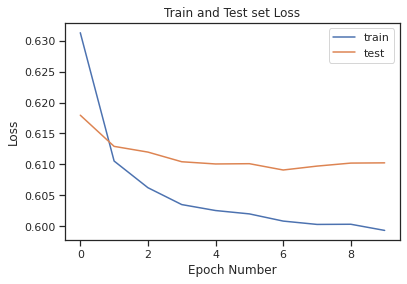

In [54]:
plt.plot(lossToPlot.history["loss"])
plt.plot(lossToPlot.history["val_loss"])
# plt.ylim(0.55,0.65)
plt.title("Train and Test set Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch Number")
plt.legend(["train", "test"], loc="upper right")
plt.show()

In [55]:
allMovies= pd.read_csv(movielens_dir / "movies.csv")
user_id = 120
watchedMovies = data[data.userId == user_id]
unWatchedMovies = allMovies[~allMovies["movieId"].isin(watchedMovies.movieId.values)]["movieId"]
unWatchedMovies = list(set(unWatchedMovies).intersection(set(movieToIndex.keys())))
unWatchedMovies = [[movieToIndex.get(x)] for x in unWatchedMovies]
Ipt=userToIndex.get(user_id)
finalM=np.hstack(([[Ipt]]*len(unWatchedMovies), unWatchedMovies))
ratings = model.predict(finalM).flatten()

In [56]:
top_ratings_indices = ratings.argsort()[-23:][::-1]
IndexesOfRecommended = [
    movieToIndex.get(unWatchedMovies[x][0]) for x in top_ratings_indices
]

In [57]:
MoviesSuggested = allMovies[allMovies["movieId"].isin(IndexesOfRecommended)]

In [58]:
print('10 Movies recommended to user 120 are:')
print('=='*70)
for row in MoviesSuggested.itertuples():
    print(row.title,"--------",row.genres)
print('=='*70)

10 Movies recommended to user 120 are:
Spanking the Monkey (1994) -------- Comedy|Drama
Run of the Country, The (1995) -------- Drama
Alphaville (Alphaville, une étrange aventure de Lemmy Caution) (1965) -------- Drama|Mystery|Romance|Sci-Fi|Thriller
True Crime (1996) -------- Mystery|Thriller
Boys (1996) -------- Drama
Oliver & Company (1988) -------- Adventure|Animation|Children|Comedy|Musical
Horseman on the Roof, The (Hussard sur le toit, Le) (1995) -------- Drama|Romance
Wallace & Gromit: The Best of Aardman Animation (1996) -------- Adventure|Animation|Comedy
Haunted World of Edward D. Wood Jr., The (1996) -------- Documentary
Great White Hype, The (1996) -------- Comedy
Last Dance (1996) -------- Drama
Cold Comfort Farm (1995) -------- Comedy
